# Чуть-чуть математики

Теперь давайте попробуем написать функцию. Например, чтобы приближённо считала гиперболический косинус. Для небольших $x$:

$$\cosh x = 1 + \frac{x^2}{2!} + \frac{x^4}{4!} + \frac{x^6}{6!} + \ldots + R(x) =
\sum_{n=0}^N \frac{x^{2n}}{(2n)!} + R(x),$$

причём $R(x) \xrightarrow[N \rightarrow \infty]{} 0$.

Это частичная сумма т.н. ряда Тейлора:

$$ f(x) = f(a)+\sum_{k=1}^\infty \frac{f^{(k)} (a)}{k!} (x - a)^k. $$

In [14]:
import math

ITERATIONS = 20

def my_cosh(x):
    """
    Вычисление гиперболического косинуса при помощи частичного суммирования
    ряда Тейлора для окрестности 0
    """
    x_pow = x * x
    multiplier = 1
    partial_sum = 1
    for n in range(1, ITERATIONS):
        x_pow *= (x * x)  # В цикле постепенно считаем степень
        multiplier *= 1 / (2*n) / (2*n - 1)   # факториал
        partial_sum += x_pow * multiplier
    
    return partial_sum

print(help(math.cosh), math.cosh(0.1))
print(help(my_cosh), my_cosh(0.1))

Help on built-in function cosh in module math:

cosh(x, /)
    Return the hyperbolic cosine of x.

None 1.0050041680558035
Help on function my_cosh in module __main__:

my_cosh(x)
    Вычисление гиперболического косинуса при помощи частичного суммирования
    ряда Тейлора для окрестности 0

None 1.000050041680558


А какое и где слабое место у нашего гипреболическго косинуса?

<function my_cosh at 0x000000D575A57160> <numpy.vectorize object at 0x000000D56D552F10>


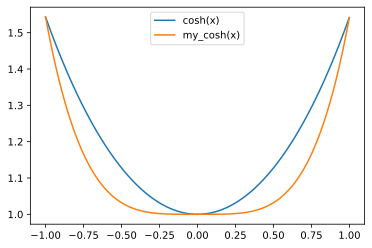

In [18]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


import matplotlib.pyplot as plt
import numpy as np

vs = np.vectorize(my_cosh)
print(my_cosh, vs)

arguments = np.r_[-1:1:0.001]
fig, ax = plt.subplots()
ax.plot(arguments, np.cosh(arguments), label = 'cosh(x)')
ax.plot(arguments, vs(arguments), label = 'my_cosh(x)')
ax.legend()
plt.show()


# Задание

Реализовать вычисление частичной суммы [ряда Тейлора для одной из элементарных функций](http://ru.math.wikia.com/wiki/%D0%A0%D1%8F%D0%B4_%D0%A2%D0%B5%D0%B9%D0%BB%D0%BE%D1%80%D0%B0) (кроме синуса 😸), аналогичным образом «испытать» получившиеся функции. 